## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

In [1]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?


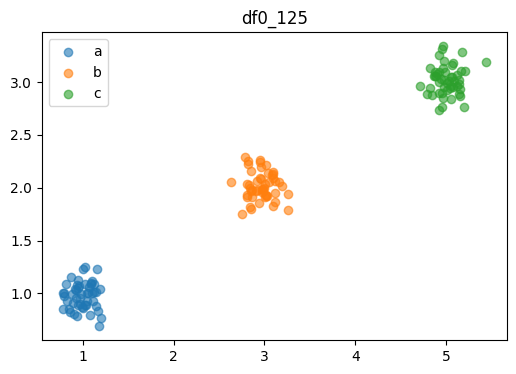

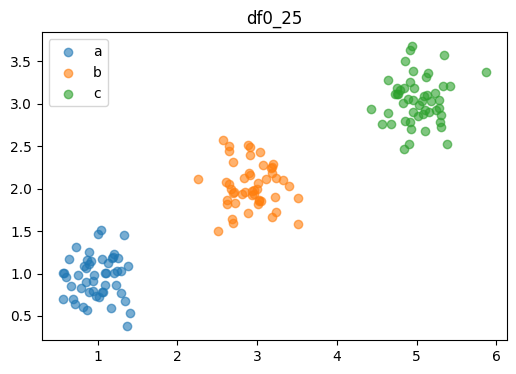

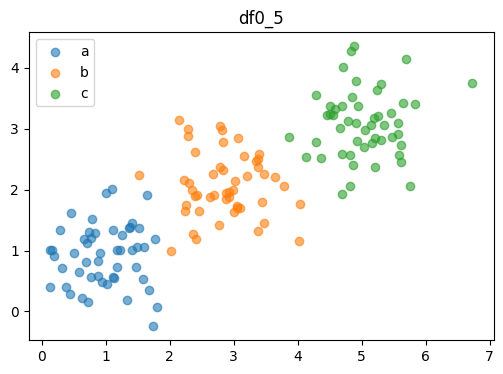

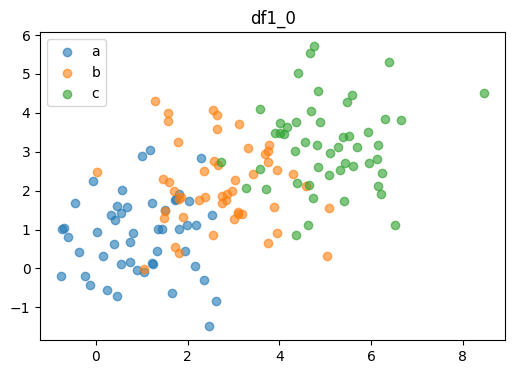

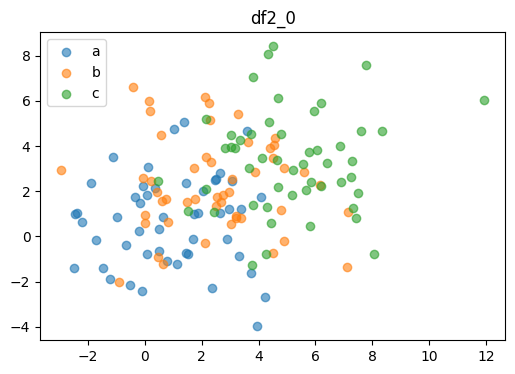

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def createData(noise, N=50):
    np.random.seed(100)
    X1 = np.array([np.random.normal(1, noise, N), np.random.normal(1, noise, N)])
    X2 = np.array([np.random.normal(3, noise, N), np.random.normal(2, noise, N)])
    X3 = np.array([np.random.normal(5, noise, N), np.random.normal(3, noise, N)])
    gdf1 = pd.DataFrame({'x1': X1[0, :], 'x2': X1[1, :], 'group': 'a'})
    gdf2 = pd.DataFrame({'x1': X2[0, :], 'x2': X2[1, :], 'group': 'b'})
    gdf3 = pd.DataFrame({'x1': X3[0, :], 'x2': X3[1, :], 'group': 'c'})
    df = pd.concat([gdf1, gdf2, gdf3], axis=0)
    return df

datasets = {
    "df0_125": createData(0.125),
    "df0_25": createData(0.25),
    "df0_5": createData(0.5),
    "df1_0": createData(1.0),
    "df2_0": createData(2.0)
}

for name, df in datasets.items():
    plt.figure(figsize=(6, 4))
    groups = df.groupby('group')
    for label, group in groups:
        plt.scatter(group.x1, group.x2, label=label, alpha=0.6)
    plt.title(name)
    plt.legend()
    plt.show()


3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)

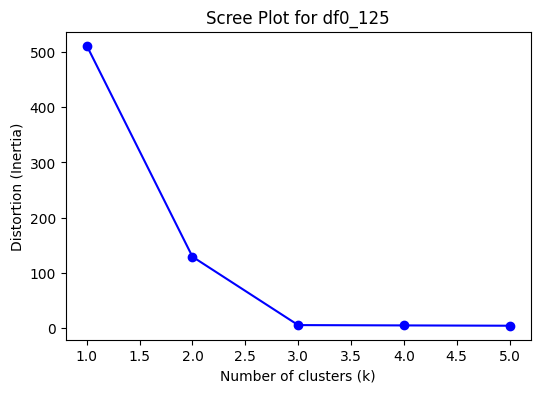

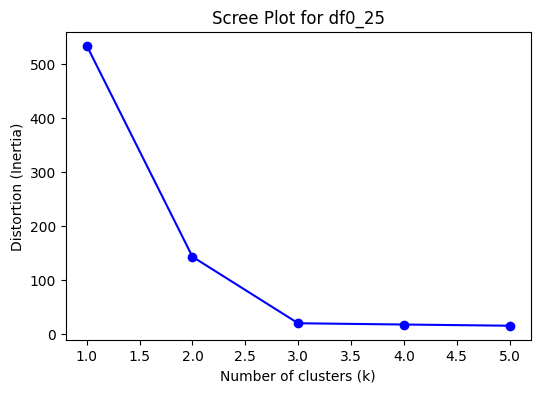

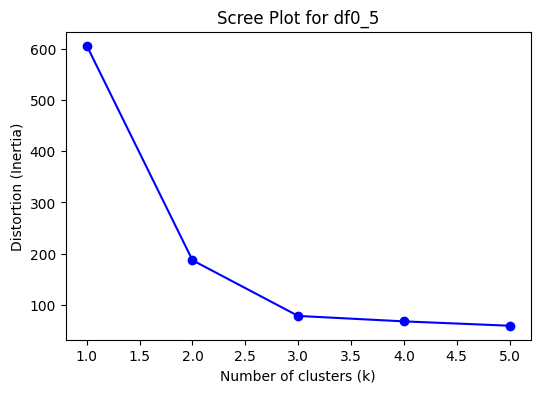

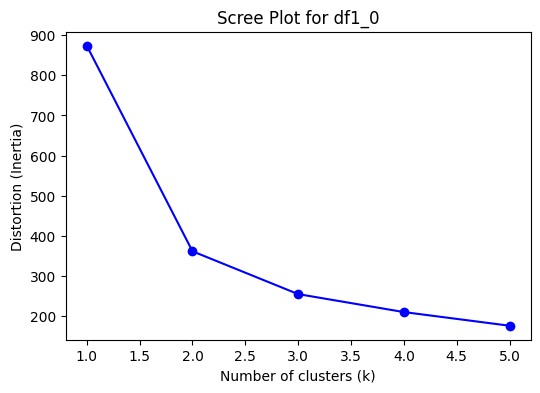

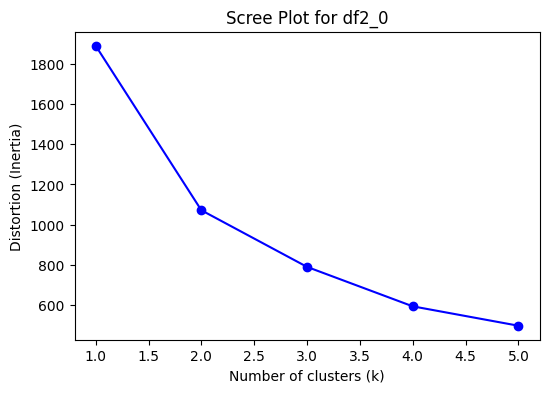

In [4]:
def plot_scree(df, title):
    X = df[['x1', 'x2']].values
    distortions = []
    K = range(1, 6)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=100, n_init=10, max_iter=300)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
    plt.figure(figsize=(6, 4))
    plt.plot(K, distortions, 'bo-', markersize=6)
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion (Inertia)')
    plt.title(f'Scree Plot for {title}')
    plt.show()

for name, df in datasets.items():
    plot_scree(df, name)


4. Explain the intuition of the elbow, using this numerical simulation as an example.

When k = 1, all points belong to one cluster, so the distortion is high. As k increases, clusters become smaller and better fit the data, reducing the distortion. At some point, increasing k beyond a certain value provides diminishing returns, hence the "elbow" appearing. The elbow is thus where the ideal k is located, as it represents the best trade-off between simplicity and accuracy.

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.

In [13]:
import pandas as pd

url = "https://raw.githubusercontent.com/deancuva/clustering/refs/heads/main/assignment/data/airbnb_hw.csv"
df = pd.read_csv(url)

def clean_column(df, column_name):
    if column_name in df.columns:
        df[column_name] = df[column_name].astype(str).str.replace(r'[^\d.]', '', regex=True)
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    else:
        print(f"Warning: Column '{column_name}' not found in DataFrame.")
    return df

columns_to_clean = ['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating']
for col in columns_to_clean:
    df = clean_column(df, col)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  30475 non-null  object 
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30478 non-null  int64  
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(4), int64(4), object

2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).

In [15]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating']

df = df.dropna(subset=columns_to_normalize)

scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 22111 entries, 4 to 30409
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     22111 non-null  int64  
 1   Host Since                  22111 non-null  object 
 2   Name                        22111 non-null  object 
 3   Neighbourhood               22111 non-null  object 
 4   Property Type               22109 non-null  object 
 5   Review Scores Rating (bin)  22111 non-null  float64
 6   Room Type                   22111 non-null  object 
 7   Zipcode                     22012 non-null  float64
 8   Beds                        22111 non-null  float64
 9   Number of Records           22111 non-null  int64  
 10  Number Of Reviews           22111 non-null  float64
 11  Price                       22111 non-null  float64
 12  Review Scores Rating        22111 non-null  float64
dtypes: float64(6), int64(2), object(5)
m

3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.

In [16]:
from sklearn.cluster import KMeans

features = ['Beds', 'Number Of Reviews', 'Review Scores Rating']

kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[features])

print(df[['Beds', 'Number Of Reviews', 'Review Scores Rating', 'Cluster']].head())


     Beds  Number Of Reviews  Review Scores Rating  Cluster
4  0.1875           0.148438                 0.950        2
5  0.0625           0.011719                 1.000        1
6  0.0625           0.031250                 1.000        1
7  0.0625           0.308594                 0.925        4
8  0.1250           0.367188                 0.875        4


4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.

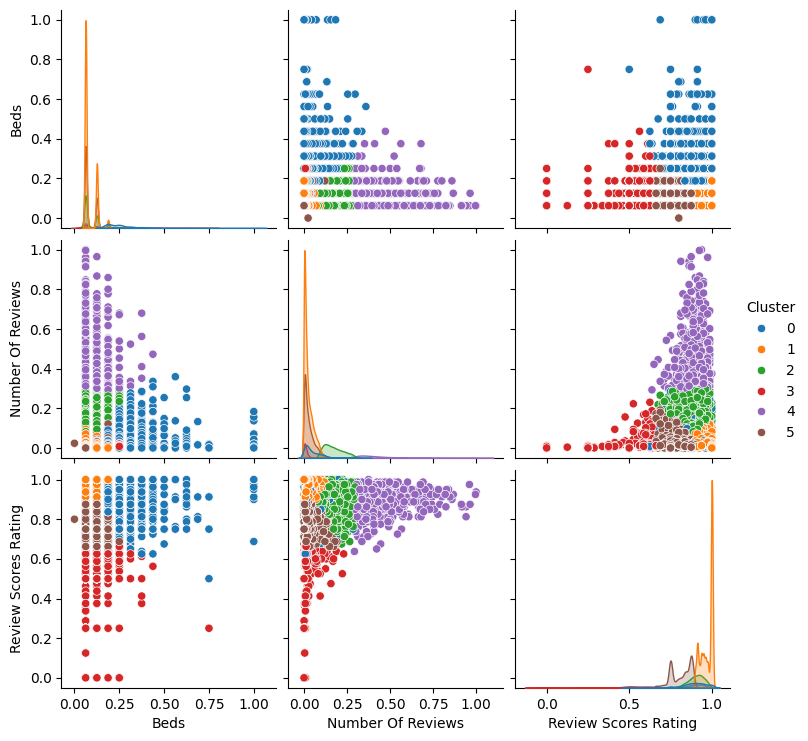

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, vars=features, hue='Cluster', palette='tab10', diag_kind='kde')
plt.show()


5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?

In [18]:
cluster_summary = df.groupby('Cluster')['Price'].describe()
print(cluster_summary)


           count      mean       std       min       25%       50%       75%  \
Cluster                                                                        
0         1633.0  0.028374  0.026270  0.001702  0.014014  0.021922  0.034034   
1        10494.0  0.014233  0.014741  0.000000  0.007508  0.012012  0.018018   
2         3019.0  0.013179  0.008427  0.001201  0.007758  0.011512  0.016517   
3          657.0  0.012348  0.021227  0.001502  0.005506  0.008909  0.014515   
4          793.0  0.012343  0.008319  0.001702  0.007007  0.010010  0.015916   
5         5515.0  0.012167  0.010290  0.001001  0.006507  0.010010  0.015916   

              max  
Cluster            
0        0.449449  
1        1.000000  
2        0.099099  
3        0.499499  
4        0.086587  
5        0.499499  


6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

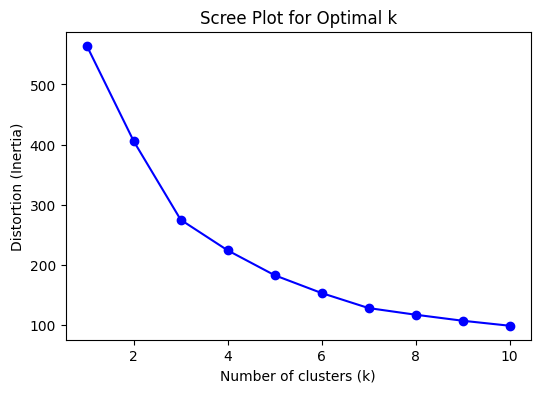

In [19]:
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df[['Beds', 'Number Of Reviews', 'Review Scores Rating']])
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, distortions, 'bo-', markersize=6)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Scree Plot for Optimal k')
plt.show()
